![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FMLOps%2Fresources%2Fimages%2Fcreated%2Fmonitoring&file=model+monitoring+metrics+visuals.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/MLOps/resources/images/created/monitoring/model%20monitoring%20metrics%20visuals.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FMLOps%2Fresources%2Fimages%2Fcreated%2Fmonitoring%2Fmodel%2520monitoring%2520metrics%2520visuals.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/MLOps/resources/images/created/monitoring/model%20monitoring%20metrics%20visuals.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/MLOps/resources/images/created/monitoring/model%20monitoring%20metrics%20visuals.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# Model Monitoring Metrics

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get Distributions

In [15]:
train_stats = [
    {'label': 'A', 'sample_count': 116},
    {'high_rank': 1, 'label': 'B', 'low_rank': 1, 'sample_count': 86},
    {'high_rank': 2, 'label': 'C', 'low_rank': 2, 'sample_count': 36}
]
serve_stats = [
    {'label': 'A', 'sample_count': 775},
    {'high_rank': 1, 'label': 'B', 'low_rank': 1, 'sample_count': 795},
    {'high_rank': 2, 'label': 'C', 'low_rank': 2, 'sample_count': 279}
]

## Combine Distributions

In [50]:
index = [i['label'] for i in train_stats]
train = [i['sample_count'] for i in train_stats]
serve = [serve_stats[index.index(k)]['sample_count'] for k in [i['label'] for i in serve_stats]]
stats = pd.DataFrame(
    {
        'train_n': train,
        'serve_n': serve,
        'train_pct': [x/sum(train) for x in train],
        'serve_pct': [x/sum(serve) for x in serve]
    },
    index = index
)
stats

train_n  serve_n  train_pct  serve_pct
A      116      775   0.487395   0.419145
B       86      795   0.361345   0.429962
C       36      279   0.151261   0.150892

In [51]:
stats.to_markdown()

'|    |   train_n |   serve_n |   train_pct |   serve_pct |\n|:---|----------:|----------:|------------:|------------:|\n| A  |       116 |       775 |    0.487395 |    0.419145 |\n| B  |        86 |       795 |    0.361345 |    0.429962 |\n| C  |        36 |       279 |    0.151261 |    0.150892 |'

## Visualize Distributions

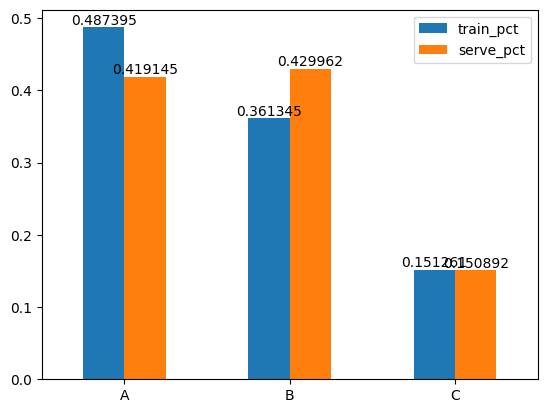

In [52]:
ax = stats[['train_pct', 'serve_pct']].plot.bar(rot=0)
for container in ax.containers:
    ax.bar_label(container)

## L-Infinity Distance

In [53]:
stats['abs_change_pct'] = abs(stats['train_pct'] - stats['serve_pct'])
stats

train_n  serve_n  train_pct  serve_pct  abs_change_pct
A      116      775   0.487395   0.419145        0.068249
B       86      795   0.361345   0.429962        0.068618
C       36      279   0.151261   0.150892        0.000368

In [54]:
stats.to_markdown()

'|    |   train_n |   serve_n |   train_pct |   serve_pct |   abs_change_pct |\n|:---|----------:|----------:|------------:|------------:|-----------------:|\n| A  |       116 |       775 |    0.487395 |    0.419145 |       0.0682495  |\n| B  |        86 |       795 |    0.361345 |    0.429962 |       0.0686176  |\n| C  |        36 |       279 |    0.151261 |    0.150892 |       0.00036813 |'

[Text(0, 0, '0.0682495'), Text(0, 0, '0.0686176'), Text(0, 0, '0.00036813')]

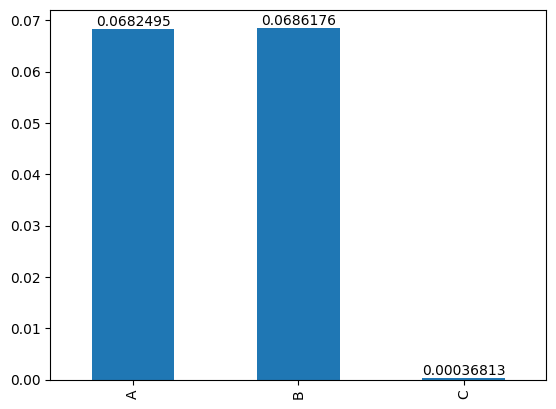

In [55]:
ax = stats['abs_change_pct'].plot.bar()
ax.bar_label(ax.containers[0])

In [56]:
print(f"The max change in percentage(L-Infinity Distance) is {max(stats['abs_change_pct'])}")

The max change in percentage(L-Infinity Distance) is 0.06861760388308918


## Plot For Writeup - L-Infinity

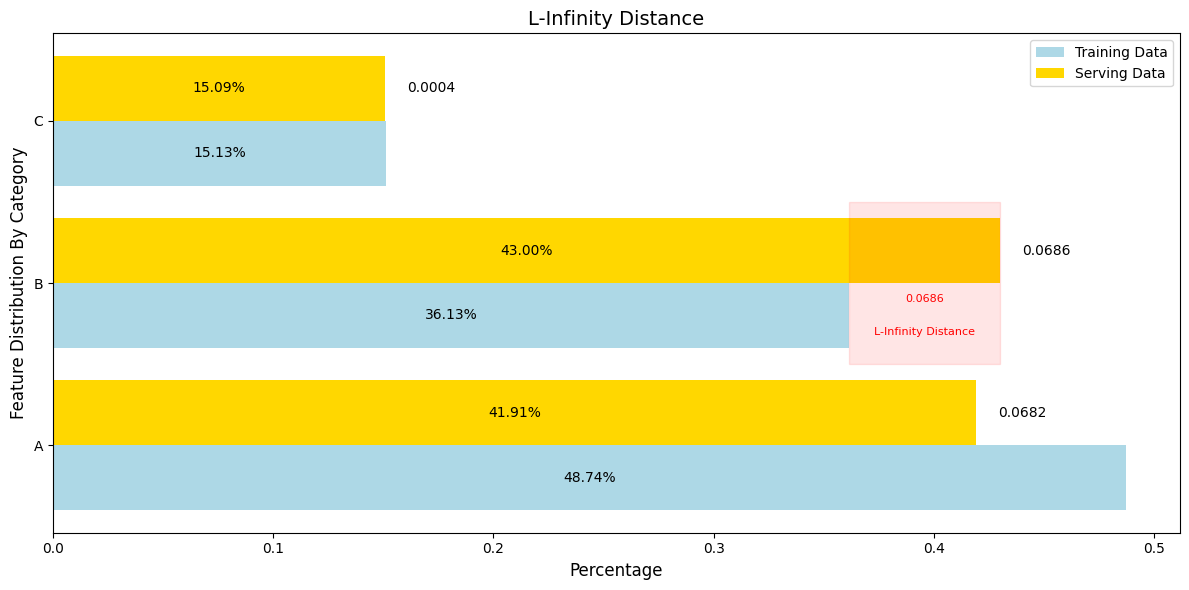

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for the grouped bar chart
plot_data = pd.DataFrame({
    'Category': stats.index,
    'train_pct': stats['train_pct'],
    'serve_pct': stats['serve_pct'],
    'abs_change_pct': stats['abs_change_pct']
})

# Melt the DataFrame to have 'train_pct' and 'serve_pct' in one column
plot_data_melted = plot_data.melt(id_vars='Category', value_vars=['train_pct', 'serve_pct'], var_name='Distribution', value_name='Percentage')

# Create the grouped horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

# Define colors
colors = {'train_pct': 'lightblue', 'serve_pct': 'gold'}  # Lighter blue and darker yellow

# Create the bars
for i, category in enumerate(plot_data['Category']):
    train_value = plot_data[plot_data['Category'] == category]['train_pct'].values[0]
    serve_value = plot_data[plot_data['Category'] == category]['serve_pct'].values[0]
    abs_change = plot_data[plot_data['Category'] == category]['abs_change_pct'].values[0]

    # Plot train bar
    ax.barh(i - 0.2, train_value, height=0.4, color=colors['train_pct'], label='Training Data' if i == 0 else "")
    ax.text(train_value / 2, i - 0.2, f'{train_value:.2%}', ha='center', va='center', color='black')

    # Plot serve bar
    ax.barh(i + 0.2, serve_value, height=0.4, color=colors['serve_pct'], label='Serving Data' if i == 0 else "")
    ax.text(serve_value / 2, i + 0.2, f'{serve_value:.2%}', ha='center', va='center', color='black')

    # Add abs_change_pct on top of the serve_pct bar
    ax.text(serve_value + 0.01, i + 0.2, f'{abs_change:.4f}', ha='left', va='center', color='black')

# Set chart title and labels
ax.set_title('L-Infinity Distance', fontsize=14)
ax.set_xlabel('Percentage', fontsize=12)
ax.set_ylabel('Feature Distribution By Category', fontsize=12)
ax.set_yticks(range(len(plot_data['Category'])))
ax.set_yticklabels(plot_data['Category'])
ax.legend(loc='upper right')  # Legend in upper right

# Get L-Infinity Distance Value
l_infinity_value = plot_data['abs_change_pct'].max()
l_infinity_category = plot_data[plot_data['abs_change_pct'] == l_infinity_value]['Category'].values[0]

# Highlight the L-infinity distance
for i, category in enumerate(plot_data['Category']):
    if category == l_infinity_category:
        # Find the train and serve percentages for the category
        train_pct = plot_data[plot_data['Category'] == category]['train_pct'].values[0]
        serve_pct = plot_data[plot_data['Category'] == category]['serve_pct'].values[0]

        # Determine the left and right x-coordinates of the rectangle
        left_x = min(train_pct, serve_pct)
        width = abs(train_pct - serve_pct)

        # Calculate the rectangle's bottom-left corner and height
        rect_x = left_x
        rect_y = i - 0.5
        rect_height = 1

        # Create the rectangle with correct dimensions
        rect = plt.Rectangle((rect_x, rect_y), width, rect_height, linewidth=1, edgecolor='red', facecolor='red', alpha=0.1)
        ax.add_patch(rect)

        # Calculate the y-positions for the labels inside the box
        label_y_top = i - 0.3  # Position for "L-Infinity Distance" (higher)
        label_y_bottom = i - 0.1  # Position for the value (lower)

        # Calculate the x-position for the labels inside the box (centered)
        label_x = left_x + width / 2

        # Add the labels inside the rectangle on separate lines, adjusted vertical positioning
        ax.text(label_x, label_y_top, 'L-Infinity Distance', color='red', va='center', ha='center', fontsize=8)
        ax.text(label_x, label_y_bottom, f'{l_infinity_value:.4f}', color='red', va='center', ha='center', fontsize=8)

        break  # Exit loop after finding and highlighting the L-infinity category

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('l-infinity.png')  # Save the plot as a PNG
plt.show()

## Jansen-Shannon Divergence

In [58]:
stats['mix'] = (stats['train_pct'] + stats['serve_pct']) / 2
stats['train_kl'] = stats['train_pct'] * np.log2(stats['train_pct'] / stats['mix'])
stats['serve_kl'] = stats['serve_pct'] * np.log2(stats['serve_pct'] / stats['mix'])
stats['JSD'] = (stats['train_kl'] + stats['serve_kl']) / 2
stats

train_n  serve_n  train_pct  serve_pct  abs_change_pct       mix  train_kl  \
A      116      775   0.487395   0.419145        0.068249  0.453270  0.051040   
B       86      795   0.361345   0.429962        0.068618  0.395653 -0.047286   
C       36      279   0.151261   0.150892        0.000368  0.151076  0.000266   

   serve_kl           JSD  
A -0.047330  1.854970e-03  
B  0.051584  2.148752e-03  
C -0.000265  1.617671e-07

In [59]:
stats.to_markdown()

'|    |   train_n |   serve_n |   train_pct |   serve_pct |   abs_change_pct |      mix |     train_kl |     serve_kl |         JSD |\n|:---|----------:|----------:|------------:|------------:|-----------------:|---------:|-------------:|-------------:|------------:|\n| A  |       116 |       775 |    0.487395 |    0.419145 |       0.0682495  | 0.45327  |  0.05104     | -0.04733     | 0.00185497  |\n| B  |        86 |       795 |    0.361345 |    0.429962 |       0.0686176  | 0.395653 | -0.0472862   |  0.0515837   | 0.00214875  |\n| C  |        36 |       279 |    0.151261 |    0.150892 |       0.00036813 | 0.151076 |  0.000265711 | -0.000265388 | 1.61767e-07 |'

In [60]:
print(f"The total for the Jansen-Shannon Divergence is {sum(stats['JSD'])}")

The total for the Jansen-Shannon Divergence is 0.0040038845841986435


## Plots For Writeup - Jansen-Shannon Divergence

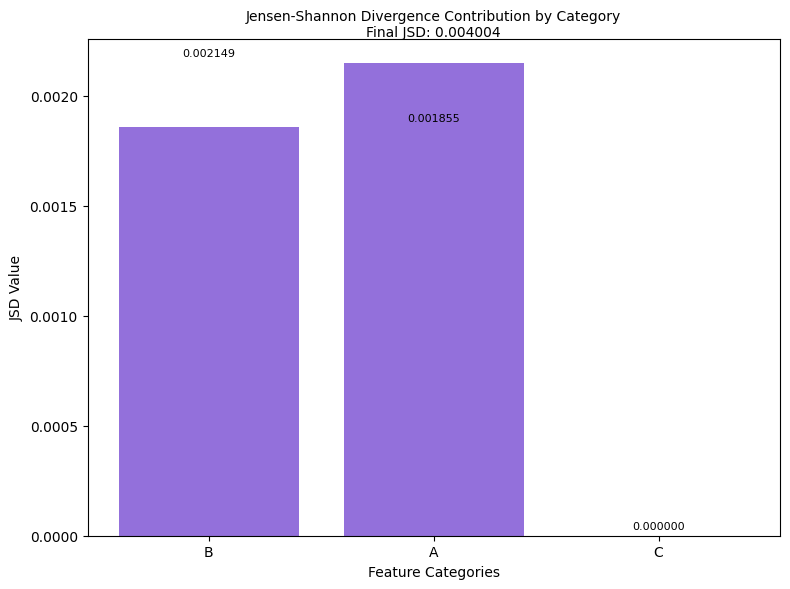

In [62]:
import matplotlib.pyplot as plt

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure height for subtitle

# Get the JSD values for each category
jsd_values = stats['JSD']

# Create the bars with lighter purple color
ax.bar(jsd_values.index, jsd_values.values, color='mediumpurple')

# Set chart title and labels
ax.set_title('Jensen-Shannon Divergence Contribution by Category', fontsize=12, pad=20)  # Add padding for main title

# Add subtitle with the final JSD value
final_jsd = sum(jsd_values)
ax.set_title(f'Jensen-Shannon Divergence Contribution by Category\nFinal JSD: {final_jsd:.6f}',
             fontsize=10, loc='center', pad=-10)  # Subtitle settings

ax.set_ylabel('JSD Value', fontsize=10)
ax.set_xlabel('Feature Categories', fontsize=10)

# Sort the bars (optional)
jsd_values_sorted = jsd_values.sort_values(ascending=False)
ax.set_xticks(range(len(jsd_values_sorted)))
ax.set_xticklabels(jsd_values_sorted.index)

# Add text annotations for the JSD values at the top of each bar
for i, v in enumerate(jsd_values_sorted):
    # Calculate y-position slightly above the bar top
    label_y = v + (0.01 * jsd_values_sorted.max())  # Adjust the 0.01 factor as needed
    ax.text(i, label_y, f'{v:.6f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.savefig('jsd.png')  # Save the plot as a PNG
plt.show()